In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,plot_roc_curve

In [2]:
df= pd.read_csv("wineanalysis.csv")

In [3]:
df.head(3)

Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0           1            7.4              0.70         0.00             1.9   
1           2            7.8              0.88         0.00             2.6   
2           3            7.8              0.76         0.04             2.3   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   

   sulphates  alcohol  quality type  
0       0.56      9.4        5  red  
1       0.68      9.8        5  red  
2       0.65      9.8        5  red

In [4]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

# EDA

### Variable Identification

In [5]:
df.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [6]:
print(len(df['type'].unique()))
(df['type'].unique())

2


array(['red', 'white'], dtype=object)

In [7]:
#class_counts = df.groupby('type').size()
#print(class_counts)
df['type'].value_counts()
print(df['type'].value_counts().sort_index())

red      1599
white    4898
Name: type, dtype: int64


In [8]:
#note: want to balance the data Based on oversampling

### Univariate,BIvariate, multivareate  Analysis

In [9]:
df_red=df.loc[df['type']=='red']
df_white=df.loc[df['type']=='white']
print(df_red.shape)
print(df_white.shape)

(1599, 13)
(4898, 13)


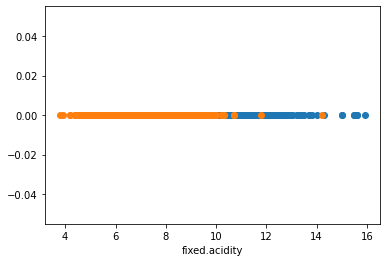

In [10]:
plt.plot(df_red['fixed.acidity'],np.zeros_like(df_red['fixed.acidity']),'o')
plt.plot(df_white['fixed.acidity'],np.zeros_like(df_white['fixed.acidity']),'o')
plt.xlabel('fixed.acidity')
plt.show()

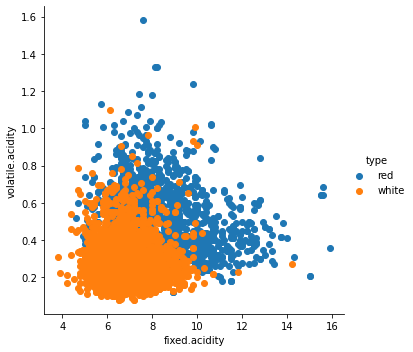

In [11]:
sns.FacetGrid(df,hue="type",size=5).map(plt.scatter,"fixed.acidity","volatile.acidity").add_legend();
plt.show()

###### Based on on assumption on "All features overlaped each other" i move to pair plot

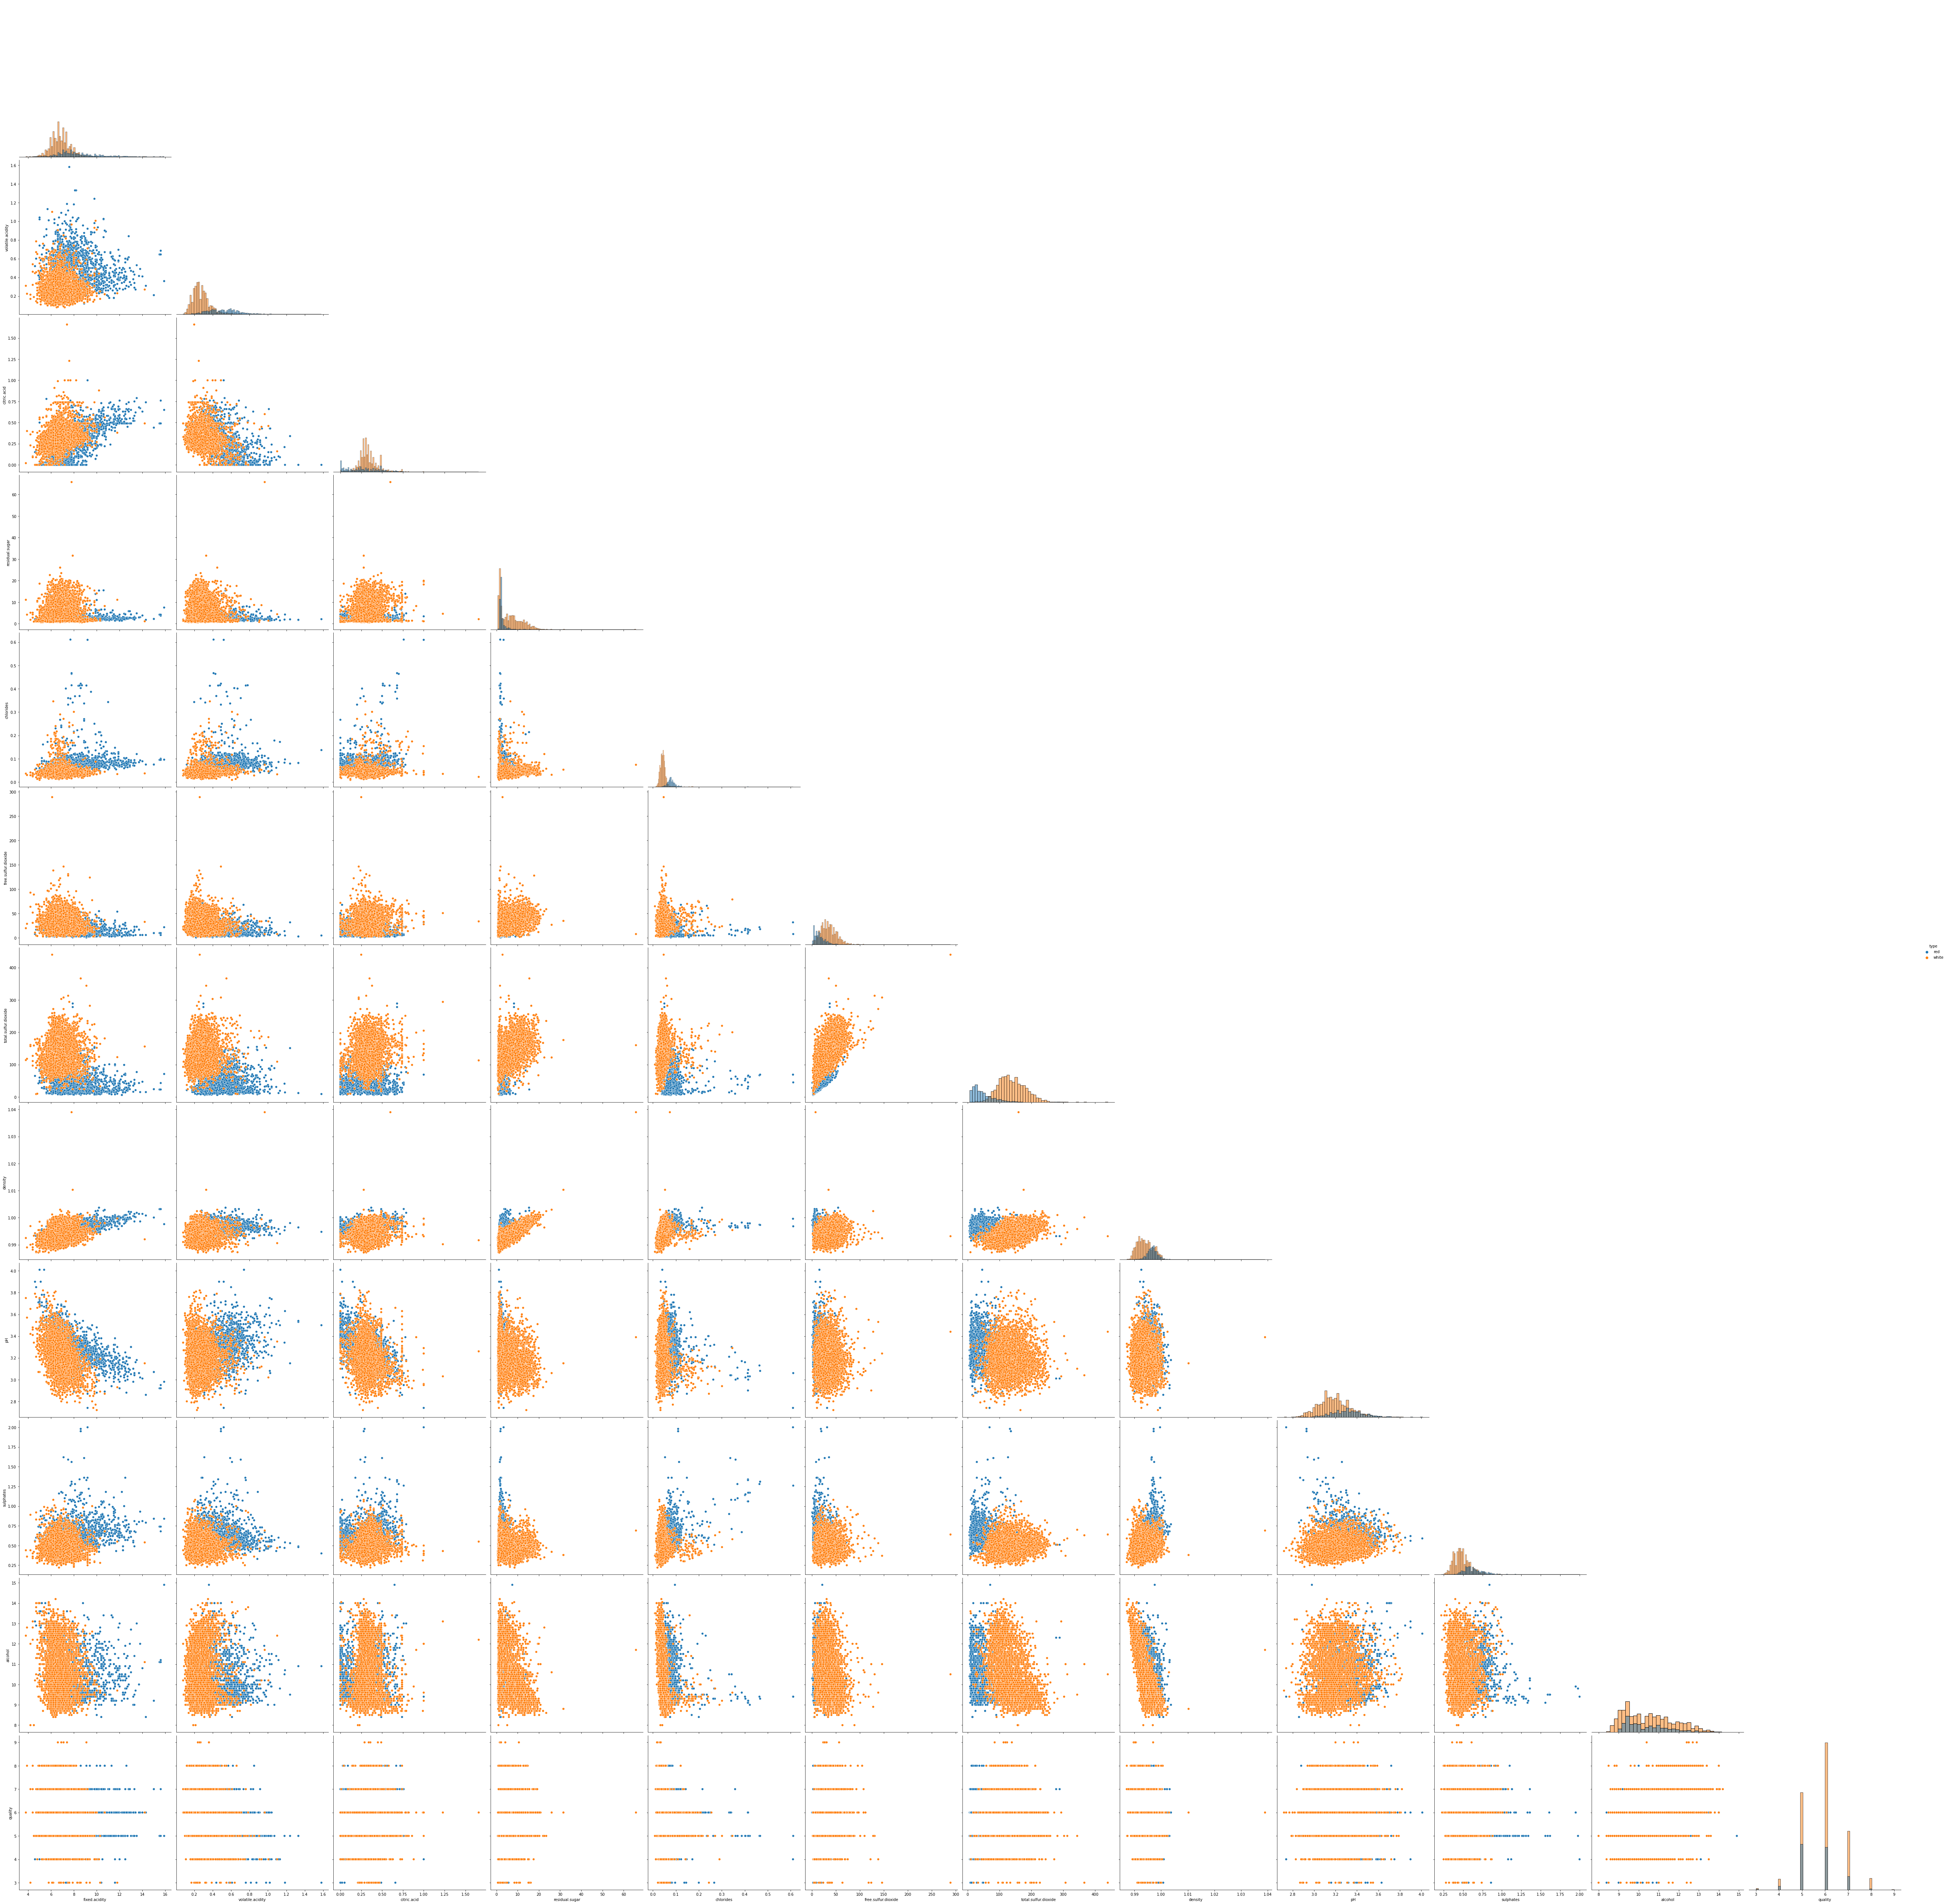

In [12]:
sns.pairplot(df,hue='type',height=6,corner=True,diag_kind="hist")

In [13]:
for i in list(df.columns[df.dtypes=='object']): # checking value counts of all object type columns
    print(df[i].value_counts(normalize=True))
    print()

white    0.753886
red      0.246114
Name: type, dtype: float64



### $missing Values

                      Total  Percent
fixed.acidity             0      0.0
volatile.acidity          0      0.0
citric.acid               0      0.0
residual.sugar            0      0.0
chlorides                 0      0.0
free.sulfur.dioxide       0      0.0
total.sulfur.dioxide      0      0.0
density                   0      0.0
pH                        0      0.0
sulphates                 0      0.0
alcohol                   0      0.0
quality                   0      0.0
type                      0      0.0


<AxesSubplot:>

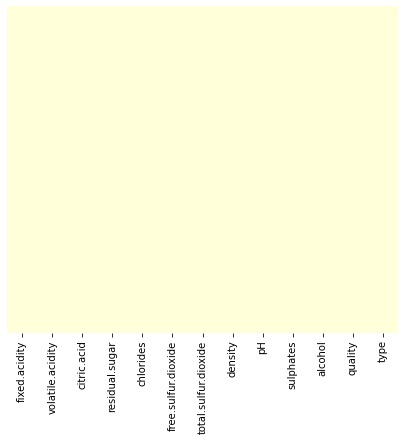

In [14]:
df = df.fillna(np.nan)

fig=plt.figure(figsize=(7,6))
total=df.isnull().sum().sort_values(ascending=True)
percentage=df.isnull().mean()

missing_data=pd.concat([total,percentage], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

### $Categorical Data

In [15]:
### To find how many Labels found in each and every cloumn
for feature in df.columns[:]:
    if df[feature].dtypes=="object":
        print(feature,":",len(df[feature].unique()),'labels')
lb=LabelEncoder()
#used label Encoding
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lb.fit_transform(df[i])
df.head(5)

type : 2 labels


fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2      9.8        5     0  
3      9.8        6     0  
4      9.4        5     0

In [16]:
X=df[['fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']]
Y=df[['type']]
print(type(X),type(Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


### $Outliers

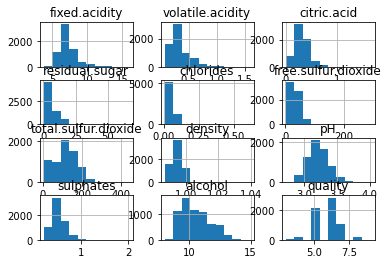

In [18]:
X.hist()
plt.show()

<AxesSubplot:>

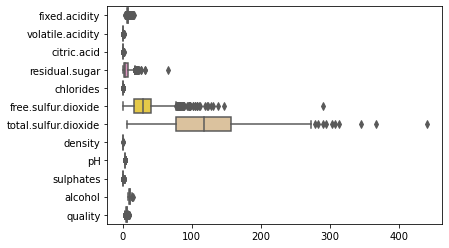

In [19]:
sns.boxplot(data=X, orient="h", palette="Set2")

In [20]:
skew = X.skew()
skew

fixed.acidity           1.723290
volatile.acidity        1.495097
citric.acid             0.471731
residual.sugar          1.435404
chlorides               5.399828
free.sulfur.dioxide     1.220066
total.sulfur.dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

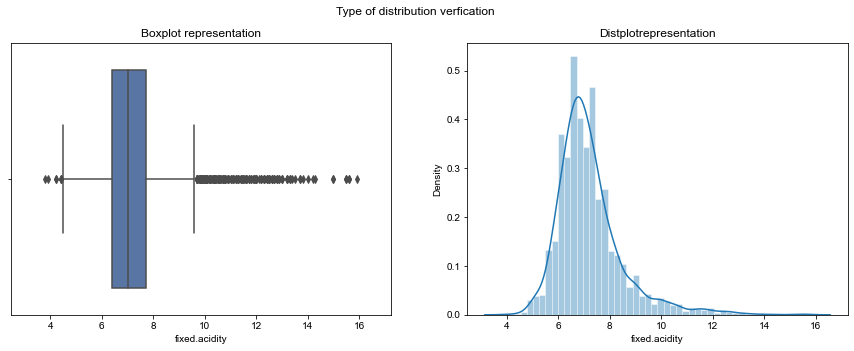

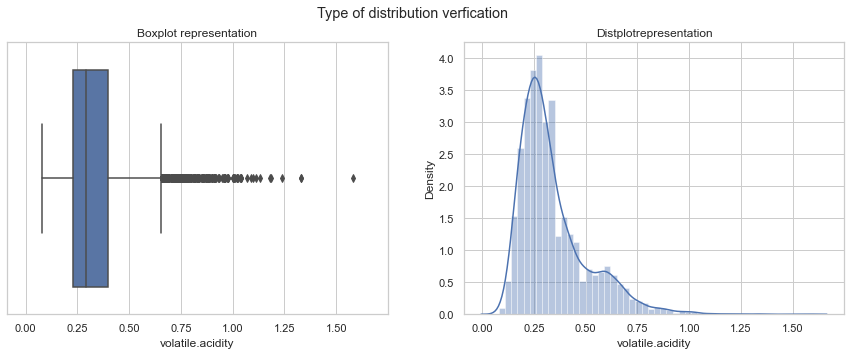

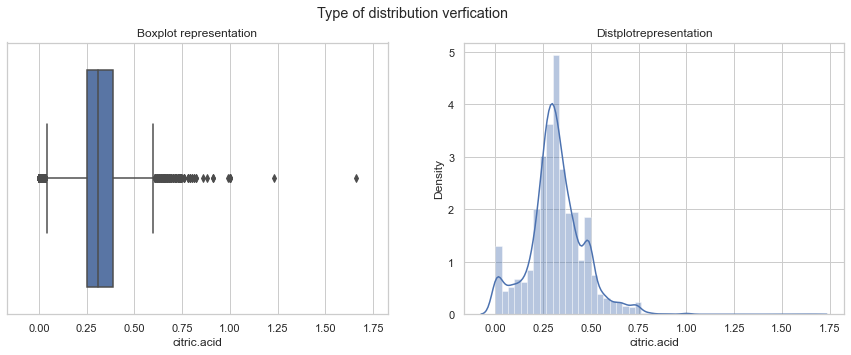

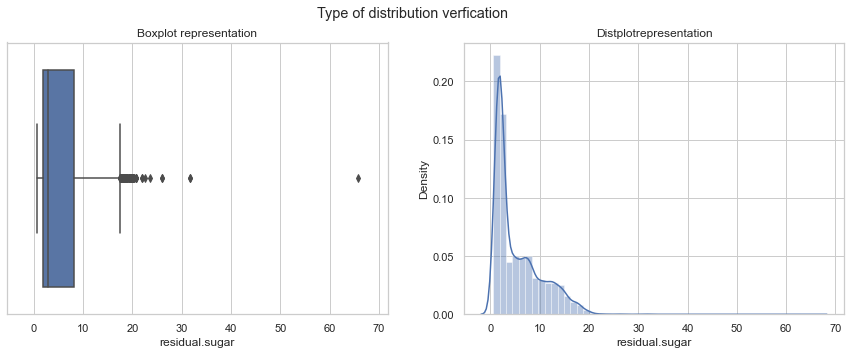

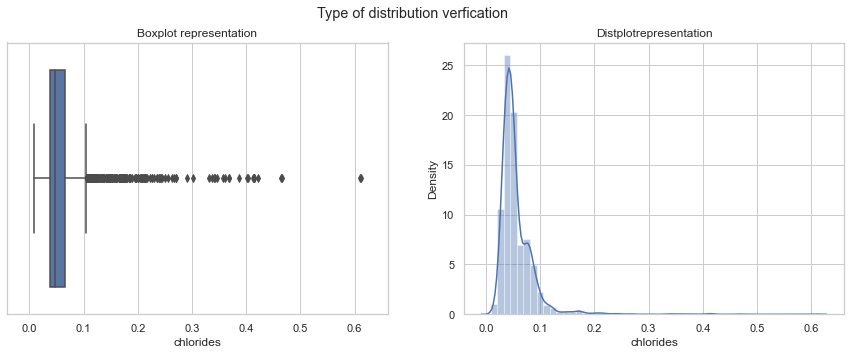

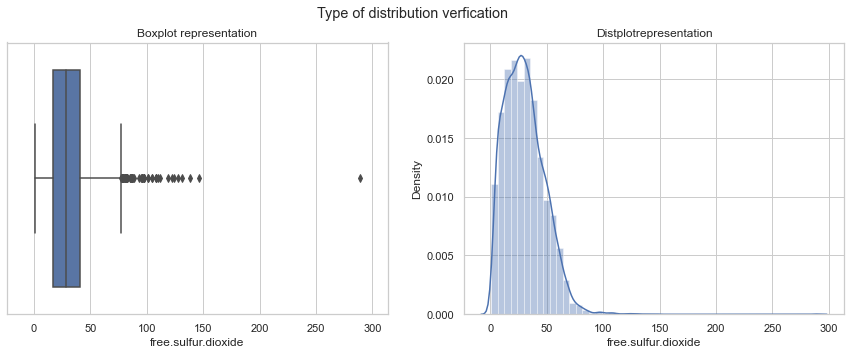

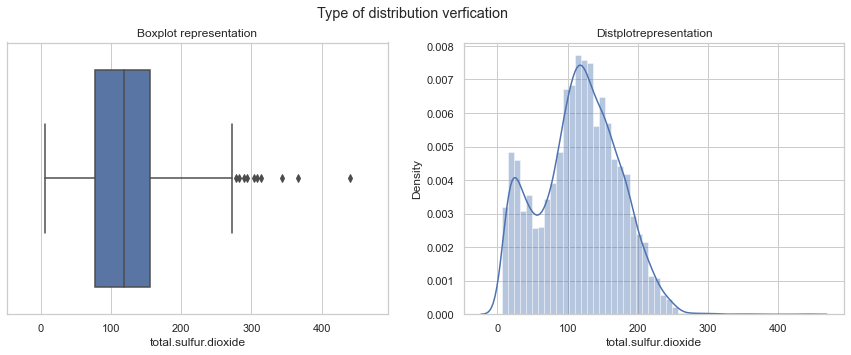

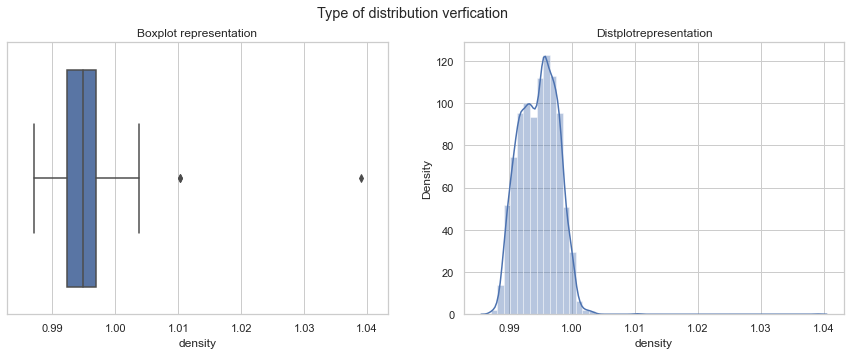

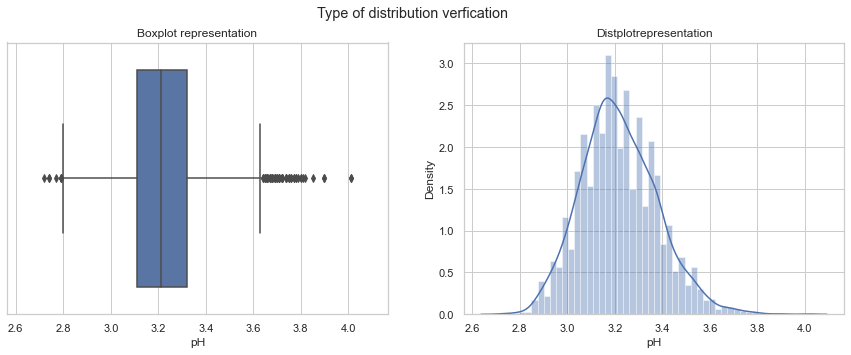

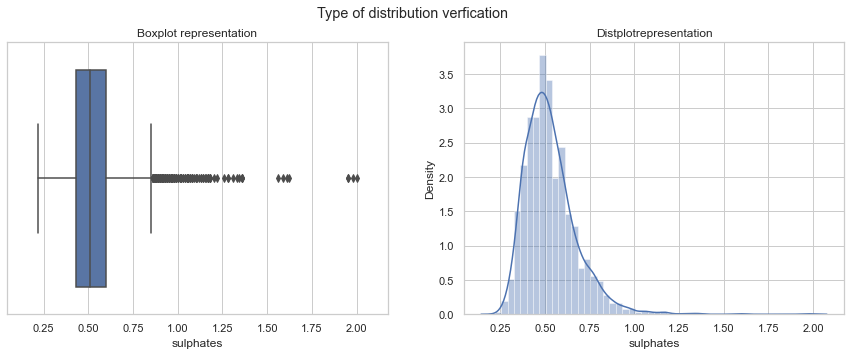

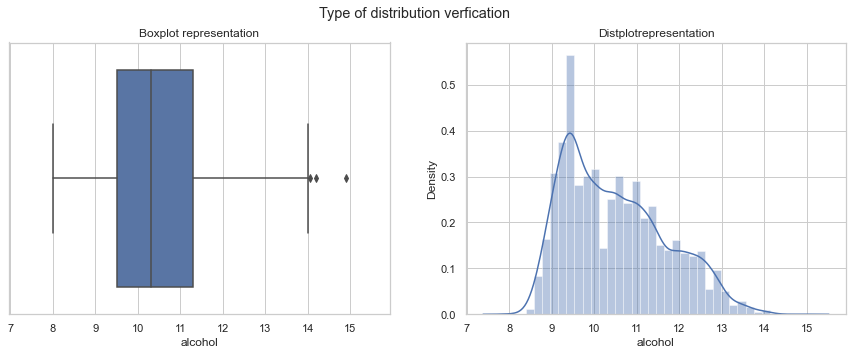

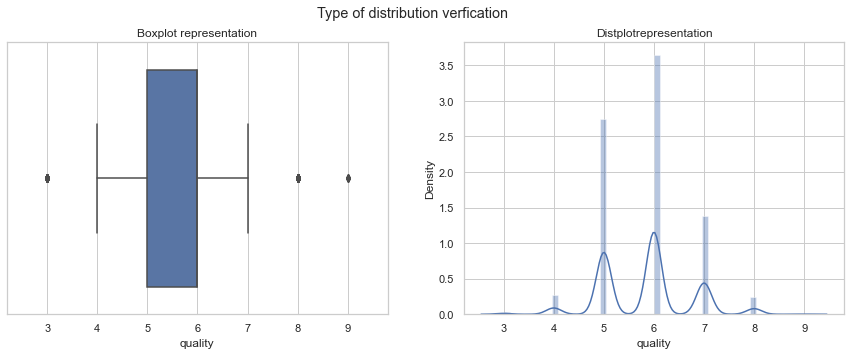

In [21]:
for i in X:  #df.iloc[:,:-1]:
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    fig.suptitle('Type of distribution verfication')
    axes[0].set_title('Boxplot representation')
    axes[1].set_title('Distplotrepresentation')
    sns.set_theme(style="whitegrid")
    sns.boxplot(X[i],ax=axes[0])
    sns.distplot(X[i],ax=axes[1])
    plt.show()

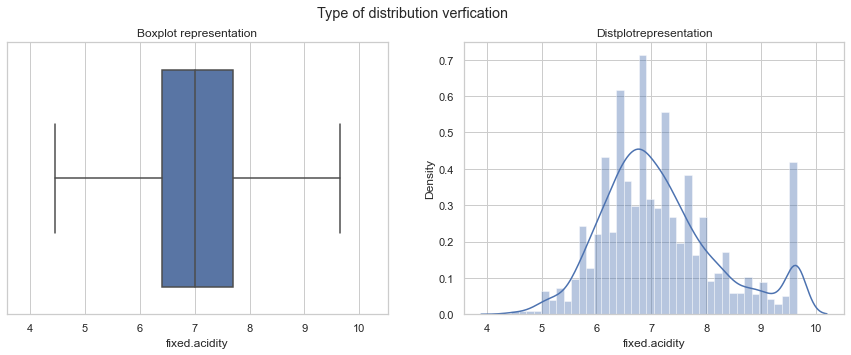

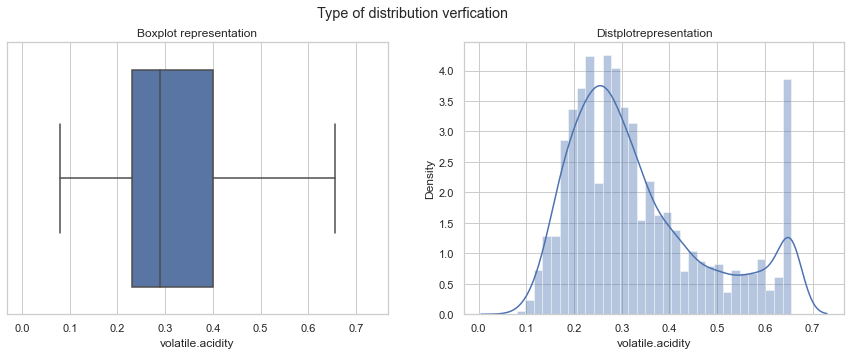

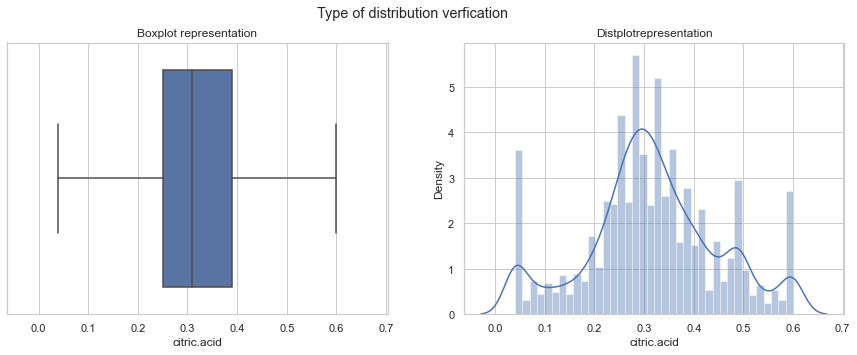

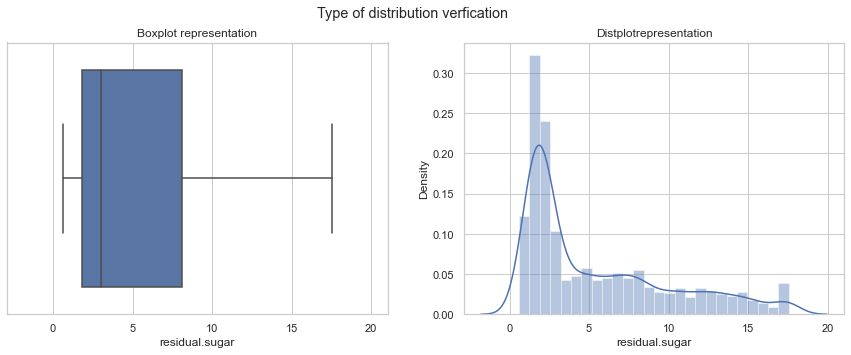

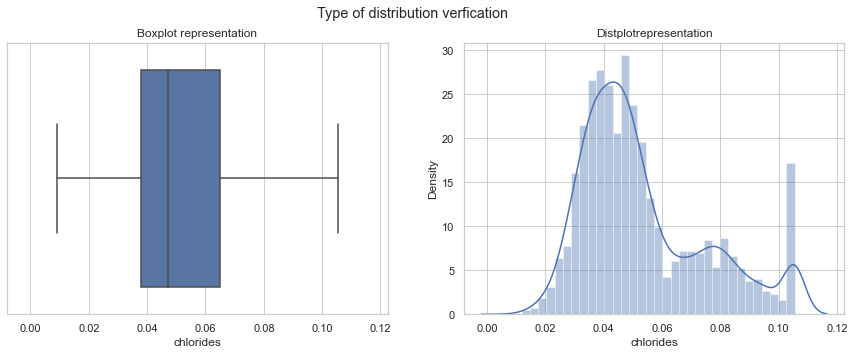

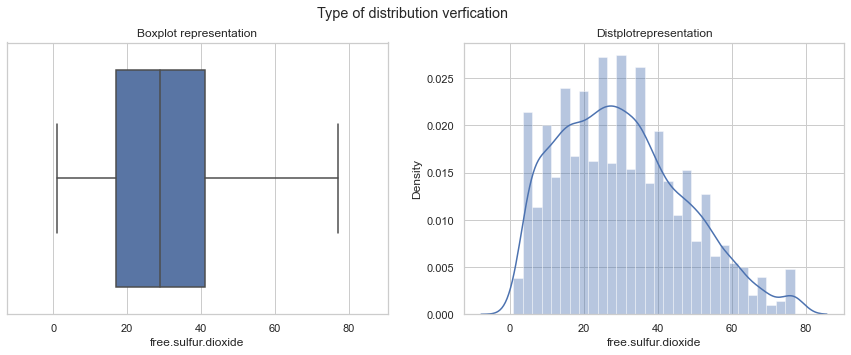

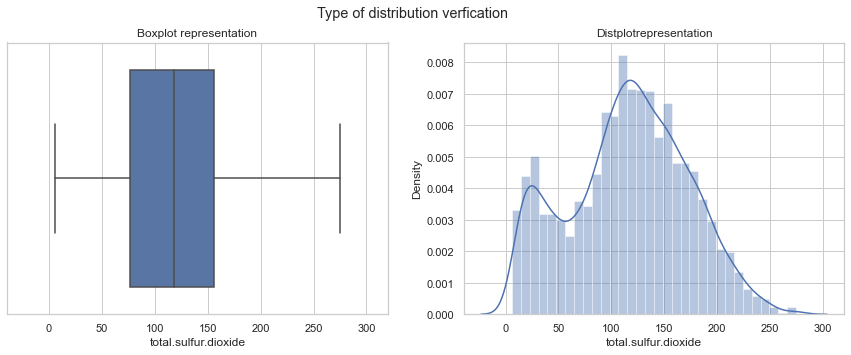

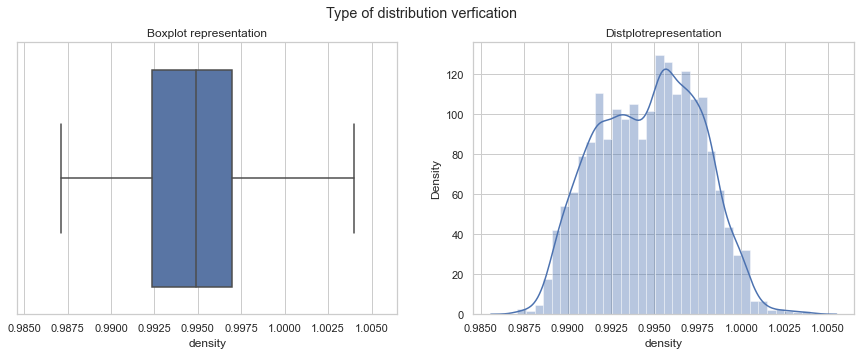

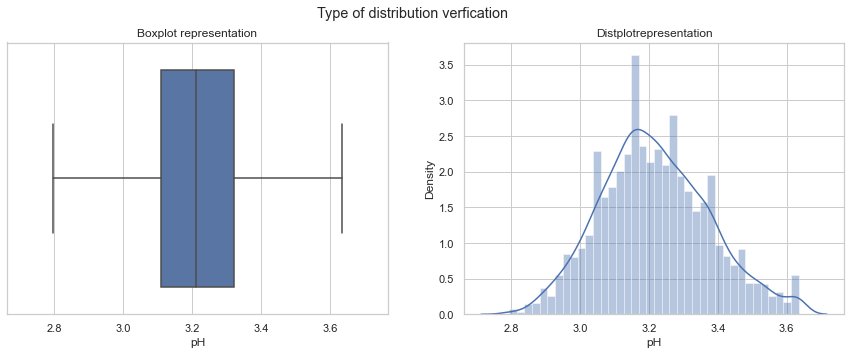

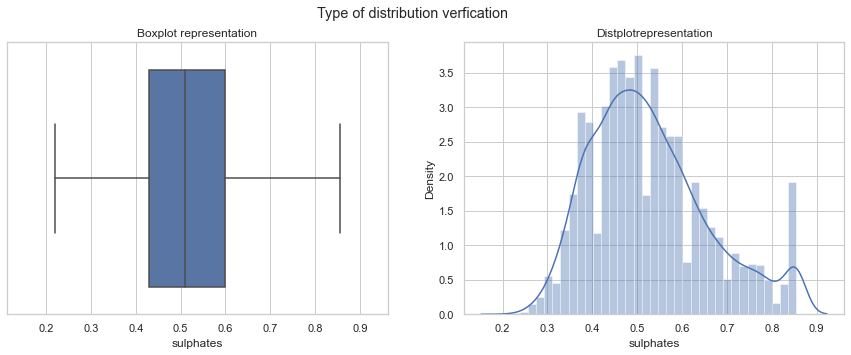

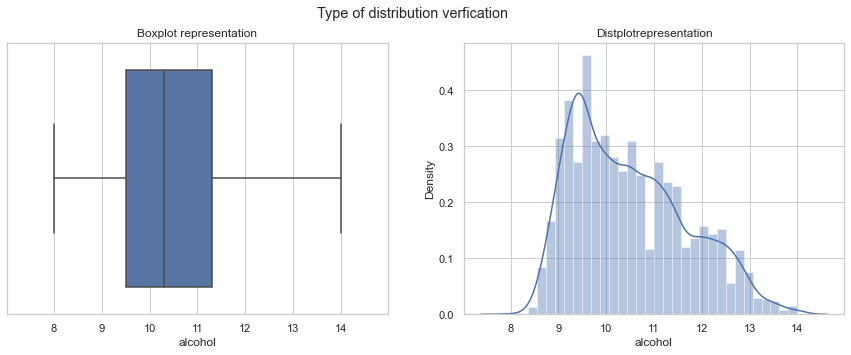

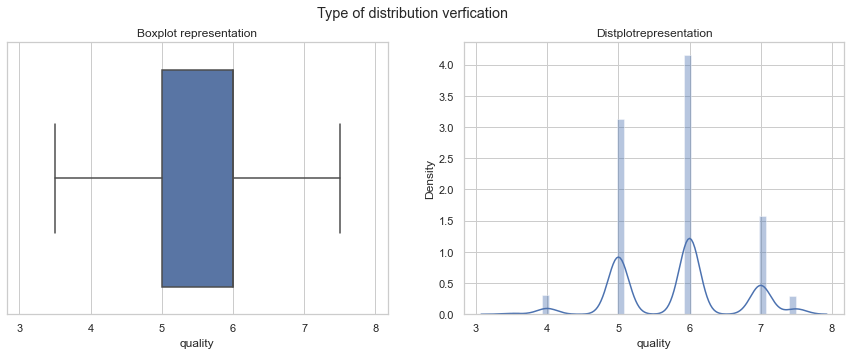

In [22]:
for i in X: #df.iloc[:,:-1]:
    # outlier in Bmi feature i used IRQ method 
    min_thresold, max_thresold = X[i].quantile([0.25, 0.75])
    percentile25 = X[i].quantile(0.25)
    percentile75 = X[i].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    #i am replacing the  outliers
    X[i] = np.where(X[i] > upper_limit,upper_limit,X[i])
    X[i] = np.where(X[i] < lower_limit,lower_limit,X[i])
    #remove outliers
    #df = df[(df[i]<upper_limit) & (df[i]>lower_limit)]
 
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    fig.suptitle('Type of distribution verfication')
    axes[0].set_title('Boxplot representation')
    axes[1].set_title('Distplotrepresentation')
    sns.set_theme(style="whitegrid")
    sns.boxplot(X[i],ax=axes[0])
    sns.distplot(X[i],ax=axes[1])
    plt.show()

In [23]:
#red      1599
#white    4898
X.shape

(6497, 12)

In [24]:
corr= X.corr() #df.iloc[:,:-1]
corr

fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity              1.000000          0.235811     0.301089   
volatile.acidity           0.235811          1.000000    -0.387797   
citric.acid                0.301089         -0.387797     1.000000   
residual.sugar            -0.104060         -0.208161     0.140336   
chlorides                  0.415449          0.524341    -0.069117   
free.sulfur.dioxide       -0.282065         -0.373211     0.144046   
total.sulfur.dioxide      -0.306621         -0.421737     0.196030   
density                    0.460904          0.278490     0.092412   
pH                        -0.259542          0.252824    -0.332583   
sulphates                  0.280396          0.249670     0.044437   
alcohol                   -0.118865         -0.037007    -0.006920   
quality                   -0.094464         -0.265249     0.096777   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity              -0.104060   0.415449            -0.282065   
volatile.acidity           -0.208161   0.524341            -0.373211   
citric.acid                 0.140336  -0.069117             0.144046   
residual.sugar              1.000000  -0.163059             0.433765   
chlorides                  -0.163059   1.000000            -0.288171   
free.sulfur.dioxide         0.433765  -0.288171             1.000000   
total.sulfur.dioxide        0.506610  -0.389156             0.731636   
density                     0.535624   0.526656             0.031155   
pH                         -0.274098   0.155165            -0.155892   
sulphates                  -0.193263   0.379896            -0.202364   
alcohol                    -0.367401  -0.325927            -0.186343   
quality                    -0.038457  -0.256337             0.068873   

                      total.sulfur.dioxide   density        pH  sulphates  \
fixed.acidity                    -0.306621  0.460904 -0.259542   0.280396   
volatile.acidity                 -0.421737  0.278490  0.252824   0.249670   
citric.acid                       0.196030  0.092412 -0.332583   0.044437   
residual.sugar                    0.506610  0.535624 -0.274098  -0.193263   
chlorides                        -0.389156  0.526656  0.155165   0.379896   
free.sulfur.dioxide               0.731636  0.031155 -0.155892  -0.202364   
total.sulfur.dioxide              1.000000  0.030802 -0.241536  -0.289446   
density                           0.030802  1.000000  0.012126   0.272442   
pH                               -0.241536  0.012126  1.000000   0.240119   
sulphates                        -0.289446  0.272442  0.240119   1.000000   
alcohol                          -0.267120 -0.701297  0.118615   0.007833   
quality                          -0.041543 -0.313105  0.020418   0.055204   

                       alcohol   quality  
fixed.acidity        -0.118865 -0.094464  
volatile.acidity     -0.037007 -0.265249  
citric.acid          -0.006920  0.096777  
residual.sugar       -0.367401 -0.038457  
chlorides            -0.325927 -0.256337  
free.sulfur.dioxide  -0.186343  0.068873  
total.sulfur.dioxide -0.267120 -0.041543  
density              -0.701297 -0.313105  
pH                    0.118615  0.020418  
sulphates             0.007833  0.055204  
alcohol               1.000000  0.447778  
quality               0.447778  1.000000

In [25]:
#Checking for  Correlated matrix more thaan  thersold value 0.9 and less thaan -0.9
column = np.full((corr.shape[0],), True, dtype=bool)
print(column)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9 or corr.iloc[i,j] <= -0.9:
            if column[j]:
                print(column[j])
                column[j] = False
print(column)
selected_columns =X.columns[column] # df.iloc[:,:-1].columns[column]
selected_columns


[ True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True]


Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
print(mask)

[[ True  True  True  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True  True  True]
 [False False False False False  True  True  True  True  True  True  True]
 [False False False False False False  True  True  True  True  True  True]
 [False False False False False False False  True  True  True  True  True]
 [False False False False False False False False  True  True  True  True]
 [False False False False False False False False False  True  True  True]
 [False False False False False False False False False False  True  True]
 [False False False False False False False False False False False  True]]


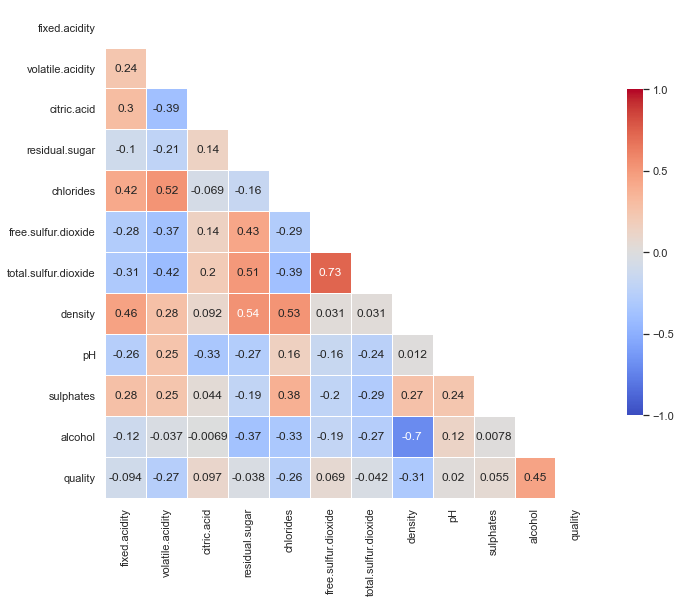

In [27]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### $data balancing

In [28]:
print(df.groupby('type').size())

type
0    1599
1    4898
dtype: int64


In [29]:
red=Y[Y['type']=='red']
white=Y[Y['type']=='white']
print(red.shape,white.shape)

(0, 1) (0, 1)


Text(0, 0.5, 'Frequency')

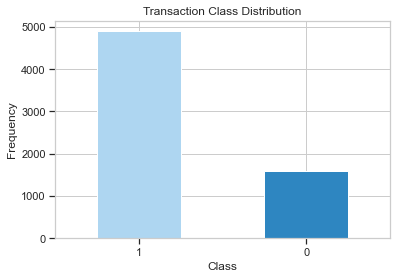

In [30]:
count_classes=pd.value_counts(Y['type'], sort = True)
class_colors=['#AED6F1','#2E86C1']
count_classes.plot(kind ='bar',rot=0,color=class_colors, title='Distribution of Training Data by Facies')
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [31]:
print(X.shape,Y.shape)
smk = SMOTETomek(random_state=42)
X, Y =smk.fit_resample(X,Y)
print(X.shape,Y.shape)

(6497, 12) (6497, 1)
(9748, 12) (9748, 1)


Text(0, 0.5, 'Frequency')

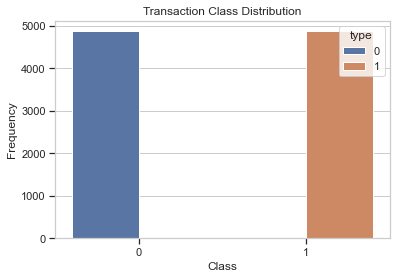

In [32]:
sns.countplot(x='type', hue='type', data=Y)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [33]:
df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2      9.8        5     0  
3      9.8        6     0  
4      9.4        5     0

In [34]:
X.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Feature scaling

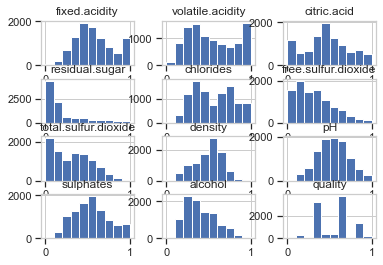

In [35]:
norm_model=MinMaxScaler()
X = norm_model.fit_transform(X)
# convert the array back to a dataframe
X = pd.DataFrame(X,columns=['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])
X.hist()
plt.show()

In [36]:
X.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    9748.000000       9748.000000  9748.000000     9748.000000   
mean        0.577120          0.540906     0.462953        0.225280   
std         0.222486          0.275441     0.259897        0.239846   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.413462          0.313043     0.303571        0.076696   
50%         0.541945          0.486957     0.464286        0.106195   
75%         0.721154          0.785162     0.634146        0.306785   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  9748.000000          9748.000000           9748.000000  9748.000000   
mean      0.553189             0.321213              0.320529     0.491727   
std       0.236769             0.217834              0.221967     0.162976   
min       0.000000             0.000000              0.000000     0.000000   
25%       0.352332             0.144737              0.115456     0.379116   
50%       0.529764             0.288678              0.309125     0.519134   
75%       0.741565             0.452313              0.484171     0.607018   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates      alcohol      quality  
count  9748.000000  9748.000000  9748.000000  9748.000000  
mean      0.538410     0.541951     0.406311     0.559851  
std       0.184018     0.209292     0.184379     0.197165  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.410714     0.393701     0.250000     0.375000  
50%       0.534131     0.527465     0.366667     0.625000  
75%       0.669717     0.673313     0.526734     0.625000  
max       1.000000     1.000000     1.000000     1.000000

In [37]:
Y.head()

type
0     0
1     0
2     0
3     0
4     0

### Split the data set into training data and test data

In [38]:
#X_train_test, X_validation, y_train_test, y_validation = train_test_split(X_std, y, test_size=0.05, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7798, 12)
(7798, 1)
(1950, 12)
(1950, 1)


Text(0, 0.5, 'Frequency of  y_test_data')

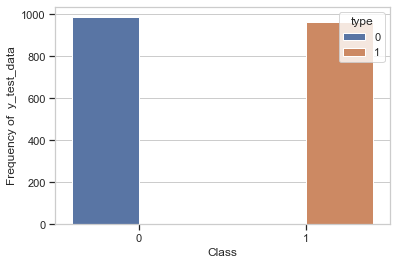

In [39]:
sns.countplot(x=y_test['type'], hue='type', data=Y)
plt.xlabel("Class")
plt.ylabel("Frequency of  y_test_data")

In [40]:
solvers =  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1', 'l2', 'elasticnet']
c_values =  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
multi_class=['auto', 'ovr', 'multinomial']
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [41]:
grid = dict(solver=solvers,penalty=penalty,C=c_values,multi_class=multi_class)
model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(model, grid,cv=cv, scoring='accuracy')
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.9938018278968215
Best Hyperparameters: {'C': 1e-05, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'sag'}


In [42]:
model = LogisticRegression(C= 10,multi_class= 'auto',penalty= 'l2',solver= 'liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       986
           1       0.99      1.00      0.99       964

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [44]:
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[978,   8],
       [  3, 961]], dtype=int64)

In [45]:
TP, FN, FP, TN = confusion_matrix(y_test,predictions,labels=[1,0]).reshape(-1)
print('Outcome values : \n','TP: ',TP,'\n','FN: ',FN,'\n','FP: ',FP,'\n','TN: ',TN,'\n')

Outcome values : 
 TP:  961 
 FN:  3 
 FP:  8 
 TN:  978 



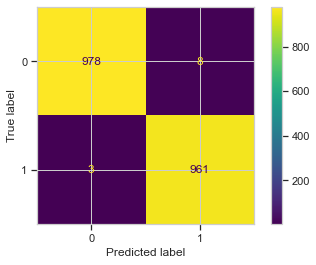

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=model.classes_)
disp.plot() 

In [47]:
pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Actual red', 'Actual white'], index=['Predicted red', 'Predicted white'])

Actual red  Actual white
Predicted red           978             8
Predicted white           3           961

Text(30.5, 0.5, 'Predicted label')

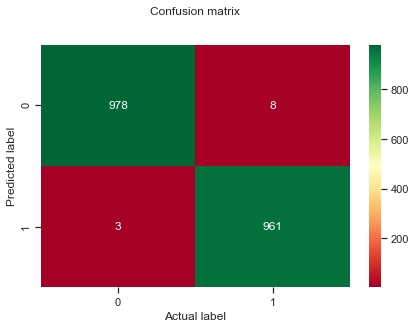

In [48]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g',cmap="RdYlGn") #cmap="YlGnBu" 
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

###### What is roc_auc_score?
roc_auc_score(y_val, y_pred) The roc_auc_score always runs from 0 to 1, 
and is sorting predictive possibilities. 0.5 is the baseline for random guessing, so you want to always get above 0.5.

In [49]:
print("Accuracy:",accuracy_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))
print("Precision:",precision_score(y_test, predictions))
print('F1 Score:',f1_score(y_test,predictions))
print('roc Auc Score:',roc_auc_score(y_test,predictions))
#print('roc Auc Score)Probility:',roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

Accuracy: 0.9943589743589744
Recall: 0.9968879668049793
Precision: 0.9917440660474717
F1 Score: 0.9943093636833936
roc Auc Score: 0.9943871882706438


### ROC_AUC Curve
AUC-ROC Curve in Machine Learning Clearly Explained
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

###### Predict will give either 0 or 1 as output. Whereas Predict_proba will give the probability of both 0 and 1.

Say, I applied predict_proba on classfication problem. Its giving a list of 2 outputs for each observation(row) as below.

[0.23780654318010663, 0.7621934568198934]

It mean, the probability of occurance of 0 is 0.237… and 1 is 0.762.

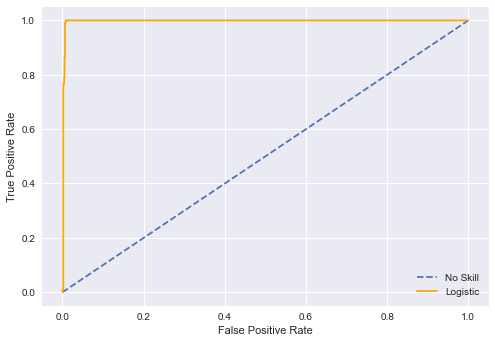

FPR       TPR  Threshold
0  0.000000  0.000000   1.999992
1  0.000000  0.003112   0.999992
2  0.000000  0.004149   0.999991
3  0.000000  0.005187   0.999989
4  0.001014  0.005187   0.999987

In [50]:
plt.style.use('seaborn')
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1],drop_intermediate=False)
#plt.scatter(fpr, tpr, alpha=0.2, color="blue", label="Scikit-learn")
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr,color='orange', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()



### Approch 1:  locate the threshold 
gmeans

In [51]:

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.432458, G-Mean=0.996


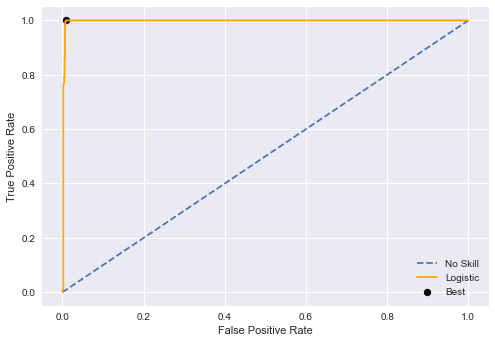

In [52]:

plt.style.use('seaborn')
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr,color='orange', label='Logistic')

plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###### Approch 2:  locate the threshold 
Youden's J statistic


###### The statistic is calculated as:

J = Sensitivity + Specificity – 1
Given that we have Sensitivity (TPR) and the complement of the specificity (FPR), we can calculate it as:

J = Sensitivity + (1 – FalsePositiveRate) – 1
Which we can restate as:

J = TruePositiveRate – FalsePositiveRate
We can then choose the threshold with the largest J statistic value

In [53]:
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1],drop_intermediate=False)


In [54]:
# get the best threshold
J = tpr - fpr
ij = np.argmax(J)
best_thresh = thresholds[ij]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.432458


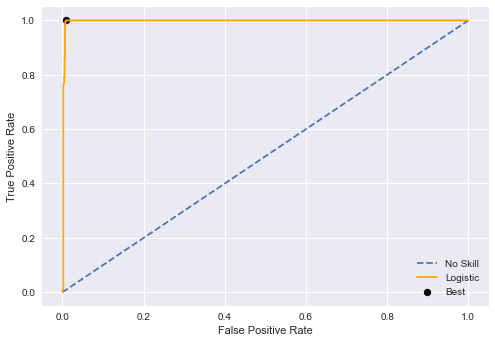

In [55]:

plt.style.use('seaborn')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr,color='orange', label='Logistic')

plt.scatter(fpr[ij], tpr[ij], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [56]:
predictions = np.where(model.predict_proba(X_test)[:,1] > 0.4306041918, 1, 0)
print("Accuracy:",accuracy_score(y_test, predictions))
print("Precision:",precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))
print('F1 Score:',f1_score(y_test,predictions))
print('roc Auc Score:',roc_auc_score(y_test,predictions,multi_class="ovr"))

Accuracy: 0.9958974358974358
Precision: 0.9917695473251029
Recall: 1.0
F1 Score: 0.9958677685950413
roc Auc Score: 0.9959432048681541


## Approch 3:  locate the threshold 

##### Refer for ths site
###### An example in Python for tuning the threshold
https://www.yourdatateacher.com/2021/06/14/are-you-still-using-0-5-as-a-threshold/

In [57]:
THRESHOLD=thresholds[np.argmin(np.abs(fpr+tpr-1))]
THRESHOLD

0.6166075706041918

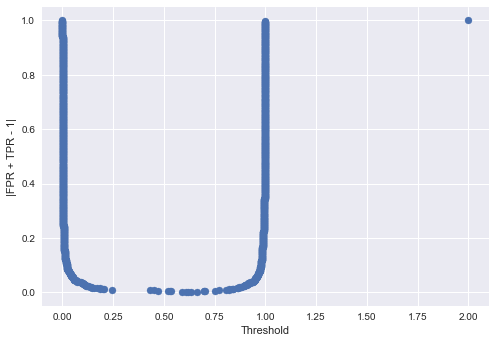

In [58]:
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

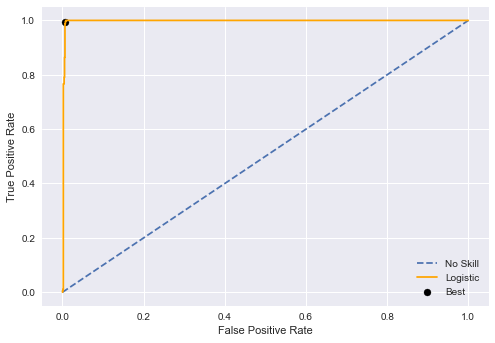

In [59]:

plt.style.use('seaborn')
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr,color='orange', label='Logistic')

plt.scatter(fpr[np.argmin(np.abs(fpr+tpr-1))], tpr[np.argmin(np.abs(fpr+tpr-1))], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###### Adjusting probability threshold for sklearn's logistic regression model
decisions = (model.predict_proba() >= mythreshold).astype(int)

In [60]:
predictions = np.where(model.predict_proba(X_test)[:,1] > 0.6166075706041918, 1, 0)

In [61]:
print("Accuracy:",accuracy_score(y_test, predictions))
print("Precision:",precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))
print('F1 Score:',f1_score(y_test,predictions))
print('roc Auc Score:',roc_auc_score(y_test,predictions,multi_class="ovr"))

Accuracy: 0.9923076923076923
Precision: 0.9927310488058152
Recall: 0.991701244813278
F1 Score: 0.9922158796056046
roc Auc Score: 0.9923009266662739
